# ASTC02 Popcorn 

In [1]:
import ipywidgets as widgets
from functools import partial
from IPython.display import display
import datetime
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

class Counter:
    def __init__(self):
        self.offset = None
        self.values = []

    def increment(self, seconds):
        self.values.append(seconds-offset)
        return self.values

    def __iter__(self, sentinal=False):
        return iter(self.increment, sentinal)
    
def button_callback(counter, w):
    now = datetime.datetime.now()
    midnight = now.replace(hour=0, minute=0, second=0, microsecond=0)
    seconds = (now - midnight).seconds
    counter.increment(seconds)  
    
now = datetime.datetime.now()
midnight = now.replace(hour=0, minute=0, second=0, microsecond=0)
offset = (now - midnight).seconds

    

counter = Counter()
w = widgets.Button(description='Pop')
w.on_click(partial(button_callback, counter))
display(w)

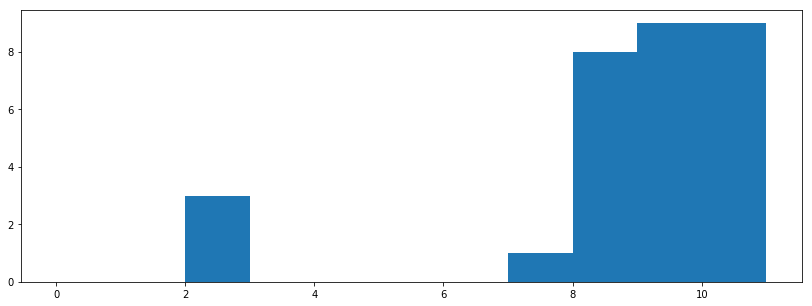

In [5]:
bin_sec = 1
values = np.array(counter.values)/bin_sec
fix, ax = plt.subplots(1,1,figsize=(14,5)) 
plt.hist(values*bin_sec,int(np.max(values)),range=(0.,np.max(values)),histtype='bar')
plt.show();

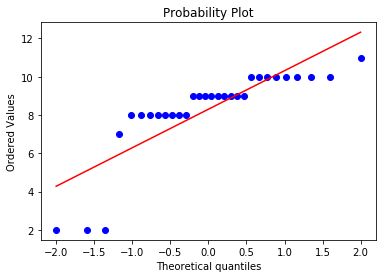

In [6]:
measurements = np.array(counter.values)/bin_sec
stats.probplot(measurements, dist="norm", plot=plt)
plt.show()